In [5]:
%pip install sktime

  Obtaining dependency information for sktime from https://files.pythonhosted.org/packages/11/92/271c96cfa842dd2bb63f040353e76c1283c0b2613149d285be60e350455e/sktime-0.34.0-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-base<0.12.0,>=0.6.1 from https://files.pythonhosted.org/packages/43/a0/e3c1f1297159c7d9e4afb64bc38e9532f59dec0d764be7a834df6fc9b211/scikit_base-0.11.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 29.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 13.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
%pip install --upgrade --force-reinstall dask

  Obtaining dependency information for dask from https://files.pythonhosted.org/packages/85/ec/0fa1997dd7070a336063663a1305e6967b7c906bd7907f2435c5ad049b0e/dask-2024.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for click>=8.1 from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Obtaining dependency information for cloudpickle>=3.0.0 from https://files.pythonhosted.org/packages/48/41/e1d85ca3cab0b674e277c8c4f678cf66a91cd2cecf93df94353a606fe0db/cloudpickle-3.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for fsspec>=2021.09.0 from https://files.pythonhosted.org/packages/c6/b2/454d6e7f0158951d8a78c2e1eb4f69ae81beb8dca5fee9809c6c99e9d0d0/fsspec-2024.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for packaging>=20.0 from https://files.pythonhosted.org/packages/08/aa/cc0199a5f

In [1]:
import pandas as pd
from sktime.annotation.clust import ClusterSegmenter
from sktime.clustering.k_means import TimeSeriesKMeans
from sktime.datasets import load_gunpoint
import matplotlib.pyplot as plt
%matplotlib inline

/Users/sneha/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import sktime
print(dir(sktime.annotation.clust))

['BaseSeriesAnnotator', 'ClusterSegmenter', 'KMeans', '__all__', '__author__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'clone', 'pd']


In [3]:
df = pd.read_csv('2024-10-24_500030__timeInter5mins_dayStart4hrs_minCarb10g_2hrMealW.csv', parse_dates=['date'], index_col='date')

In [4]:
df.head()

,bgl,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index,food_g_keep,day_start_shift
date,,,,,,,,,
2024-07-01 00:00:00-05:00,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-30
2024-07-01 00:05:00-05:00,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-30
2024-07-01 00:10:00-05:00,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-30
2024-07-01 00:15:00-05:00,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-30
2024-07-01 00:20:00-05:00,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-30


In [5]:
df.isna().sum()

bgl                      905
msg_type               25590
affects_fob            25672
affects_iob            25672
dose_units             25886
food_g                 18882
food_glycemic_index    26335
food_g_keep            25957
day_start_shift            0
dtype: int64

In [6]:
df.shape

(26496, 9)

In [7]:
X = df[['bgl']].dropna()
data = X
print(X.shape)

# Reshape X to fit the expected input shape for `TimeSeriesKMeans` if necessary:
# If you have `n_timesteps` > 1 (like in a multivariate time series), you might reshape like below:
# shape -> (n_samples, n_timesteps, n_features)
#X_reshaped = X.reshape(len(announce_meal_data), 1, 1)

clusterer = TimeSeriesKMeans()
segmenter = ClusterSegmenter(clusterer)
segmenter.fit(X)
segment_labels = segmenter.predict(X)
data['segment_label'] = segment_labels

(25591, 1)


/Users/sneha/anaconda3/lib/python3.11/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


KeyboardInterrupt: 

In [8]:
print(data)

                             bgl  segment_label
2024-07-01 00:00:00-05:00   98.0              4
2024-07-01 00:05:00-05:00  100.0              6
2024-07-01 00:10:00-05:00   98.0              4
2024-07-01 00:15:00-05:00   94.0              4
2024-07-01 00:20:00-05:00   94.0              4
...                          ...            ...
2024-09-30 23:35:00-05:00   95.0              4
2024-09-30 23:40:00-05:00   87.0              4
2024-09-30 23:45:00-05:00   86.0              4
2024-09-30 23:50:00-05:00   89.0              4
2024-09-30 23:55:00-05:00   88.0              4

[25591 rows x 2 columns]


In [9]:
data['segment_label'].unique()

array([4, 6, 7, 1, 3, 0])

In [12]:
data.columns

Index(['bgl', 'segment_label'], dtype='object')

In [7]:
df.index

DatetimeIndex(['2024-07-01 00:00:00-05:00', '2024-07-01 00:05:00-05:00',
               '2024-07-01 00:10:00-05:00', '2024-07-01 00:15:00-05:00',
               '2024-07-01 00:20:00-05:00', '2024-07-01 00:25:00-05:00',
               '2024-07-01 00:30:00-05:00', '2024-07-01 00:35:00-05:00',
               '2024-07-01 00:40:00-05:00', '2024-07-01 00:45:00-05:00',
               ...
               '2024-09-30 23:10:00-05:00', '2024-09-30 23:15:00-05:00',
               '2024-09-30 23:20:00-05:00', '2024-09-30 23:25:00-05:00',
               '2024-09-30 23:30:00-05:00', '2024-09-30 23:35:00-05:00',
               '2024-09-30 23:40:00-05:00', '2024-09-30 23:45:00-05:00',
               '2024-09-30 23:50:00-05:00', '2024-09-30 23:55:00-05:00'],
              dtype='datetime64[ns, UTC-05:00]', name='date', length=26496, freq=None)

In [8]:
df['label'] = 0
for i in range(df.shape[0]):
    if df['msg_type'][i]=='ANNOUNCE_MEAL':
        # Mark the next 24 values after 'ANNOUNCE_MEAL' as label 1
        if i + 24 < df.shape[0]:
            df['label'][i:i+24] = 1
print(df['label'])

# Extract the relevant features for clustering
X = df[['bgl']].dropna()

# Initialize the clustering model and the segmenter
clusterer = TimeSeriesKMeans()
segmenter = ClusterSegmenter(clusterer)

# Fit the model and predict clusters on the entire dataset
segmenter.fit(X, df['label'])
segment_labels = segmenter.predict(X)

# Add the segment labels back to the DataFrame
X['segment_labels'] = segment_labels

# Output the result
print(X.head())

/var/folders/k3/_3xvvcs113q2kdktg1c2q41r0000gn/T/ipykernel_72139/2319773548.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['msg_type'][i]=='ANNOUNCE_MEAL':
/var/folders/k3/_3xvvcs113q2kdktg1c2q41r0000gn/T/ipykernel_72139/2319773548.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` ins

date
2024-07-01 00:00:00-05:00    0
2024-07-01 00:05:00-05:00    0
2024-07-01 00:10:00-05:00    0
2024-07-01 00:15:00-05:00    0
2024-07-01 00:20:00-05:00    0
                            ..
2024-09-30 23:35:00-05:00    0
2024-09-30 23:40:00-05:00    0
2024-09-30 23:45:00-05:00    0
2024-09-30 23:50:00-05:00    0
2024-09-30 23:55:00-05:00    0
Name: label, Length: 26496, dtype: int64


/Users/sneha/anaconda3/lib/python3.11/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


                             bgl  segment_labels
2024-07-01 00:00:00-05:00   98.0               4
2024-07-01 00:05:00-05:00  100.0               4
2024-07-01 00:10:00-05:00   98.0               4
2024-07-01 00:15:00-05:00   94.0               4
2024-07-01 00:20:00-05:00   94.0               4


/var/folders/k3/_3xvvcs113q2kdktg1c2q41r0000gn/T/ipykernel_72139/2976024630.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


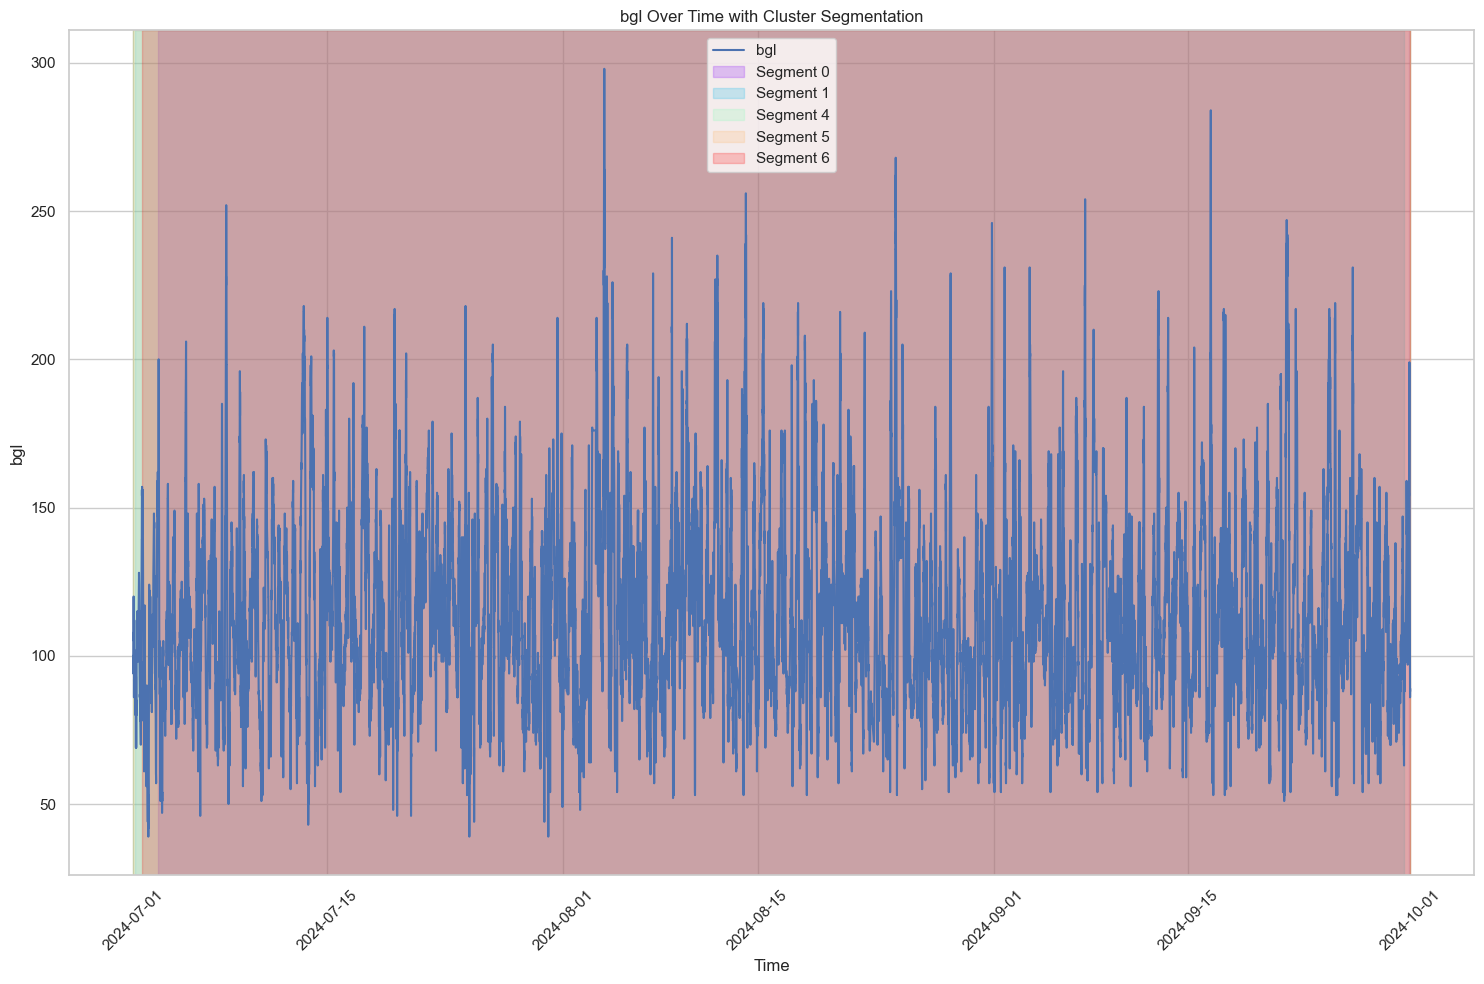

In [17]:
import numpy as np

plt.figure(figsize=(15, 10))
segmentation = X['segment_labels']
# plot the time series
plt.plot(X['bgl'].index,X['bgl'].values.flatten(), label="bgl")

# plot segmentation
unique_segments = np.unique(segmentation)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_segments)))

for segment, color in zip(unique_segments, colors):
    mask = segmentation == segment
    plt.axvspan(X['bgl'].index[mask].min(), X['bgl'].index[mask].max(), 
                alpha=0.2, color=color, label=f'Segment {segment}')

plt.title(f'bgl Over Time with Cluster Segmentation')
plt.xlabel('Time')
plt.ylabel("bgl")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()